# Analyze dataset
In this notebook, we analyze the dataset structure and statistics.

## Verify dataset and create statistics
We verify that every folder (= session) contains exactly three subfolders:
* Lapse (time lapse images taken every hour)
* Motion (images taken on motion)
* Full (pre-selected motion images with actual moving entities, should be a subset of Motion)

In [1]:
from py.Dataset import Dataset, DatasetStatistics
from py.FileUtils import list_jpegs_recursive

from tqdm import tqdm
import os

In [2]:
DIR = '/home/AMMOD_data/camera_traps/BayerWald/Vielkadaver-Projekt/'

ds = Dataset(DIR)

Found 32 sessions


In [4]:
print(ds.get_sessions())

['Beaver_01', 'Marten_01', 'Raccoon_01', 'Reddeer_01', 'Roedeer_01', 'Wildboar_01', 'Badger_02', 'Beaver_02', 'Fox_02', 'Marten_02', 'Raccoon_02', 'Rat_02', 'Reddeer_02', 'Roedeer_02', 'Badger_03', 'Fox_03', 'Raccoon_03', 'Reddeer_03', 'Wildboar_03', 'Badger_04', 'Rat_04', 'Reddeer_04', 'Wildboar_04', 'Badger_05', 'Beaver_05', 'Ermine_05', 'Fox_05', 'Marten_05', 'Raccoon_05', 'Reddeer_05', 'Roedeer_05', 'Wildboar_05']


We have 32 sessions with unique names. The name consists of the animal type and a session number. We will not count the images in all subfolders to create more advanced statistics.

In [22]:
# Only run this when statistics have not been created yet.
# Otherwise, use the code in the cell below to load the stats from file.
stats = ds.create_statistics()

100%|██████████| 32/32 [00:34<00:00,  1.09s/it]


It takes a while to create the statistics, so it makes sense to save them for later usage. The statistics can be restored using the load() method or via the constructor.

In [6]:
stats = DatasetStatistics(load_from_file="dataset_stats.npy")

Loaded from dataset_stats.npy.


Let's look at the stats.

In [7]:
stats.view()

,Lapse,Motion,Full,Total
Badger_02,1728,4715,202,6645
Badger_03,46,4245,67,4358
Badger_04,56,480,192,728
Badger_05,1174,3860,108,5142
Beaver_01,1734,695,200,2629
Beaver_02,1727,2890,270,4887
Beaver_05,1321,2415,32,3768
Ermine_05,867,2380,135,3382
Fox_02,957,1110,200,2267
Fox_03,38,5495,206,5739


In [10]:
stats.df.iloc[-1] / 203887

Total     1.000000
Full      0.021532
Lapse     0.154885
Motion    0.823584
Name: Z_Total, dtype: float64

We have a total of 203,887 images. Overall, there are significantly more motion images than lapse images. We can take a better look by plotting a bar chart:

<AxesSubplot:>

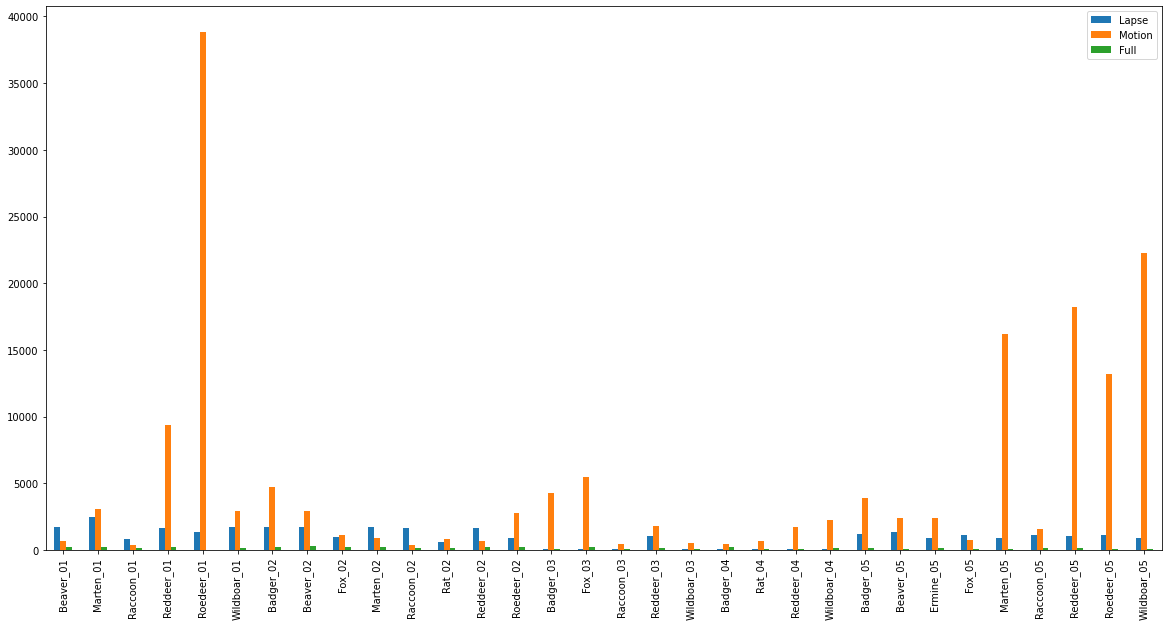

In [34]:
stats.plot_sessions(exclude_last_row=True)

## Verify that 'Full' folder is a subset of 'Motion'
We expect the 'Full' folder to be a subset of 'Motion'. The following code checks that by iterating over all files in 'Full' for every session and looking for them in 'Motion' of the same session.

In [38]:
ok = True
for folder in tqdm(ds.raw_sessions):
    fullFolder = os.path.join(DIR, folder, "Full")
    motionFolder = os.path.join(DIR, folder, "Motion")
    fullFiles = [os.path.basename(path) for path in list_jpegs_recursive(fullFolder)]
    motionFiles = [os.path.basename(path) for path in list_jpegs_recursive(motionFolder)]
    fullFilesFound = 0
    for fullFile in fullFiles:
        if fullFile in motionFiles:
            fullFilesFound += 1
    print(f"{folder}: {fullFilesFound} of {len(fullFiles)} found ({len(fullFiles) - fullFilesFound} not found)")
    if len(fullFiles) > fullFilesFound:
        ok = False
if not ok:
    print("There were files missing!")


  0%|          | 0/32 [00:00<?, ?it/s]

VIELAAS_Spring_Session01-VIELAAS_Beaver_01: 200 of 200 found (0 not found)
VIELAAS_Spring_Session01-VIELAAS_Marten_01: 200 of 200 found (0 not found)
VIELAAS_Spring_Session01-VIELAAS_Raccoon_01: 120 of 120 found (0 not found)
VIELAAS_Spring_Session01-VIELAAS_Reddeer_01: 200 of 200 found (0 not found)
VIELAAS_Spring_Session01-VIELAAS_Roedeer_01: 18 of 18 found (0 not found)
VIELAAS_Spring_Session01-VIELAAS_Wildboar_01: 137 of 137 found (0 not found)
VIELAAS_Spring_Session02-VIELAAS_Badger_02: 202 of 202 found (0 not found)
VIELAAS_Spring_Session02-VIELAAS_Beaver_02: 270 of 270 found (0 not found)
VIELAAS_Spring_Session02-VIELAAS_Fox_02: 200 of 200 found (0 not found)
VIELAAS_Spring_Session02-VIELAAS_Marten_02: 200 of 200 found (0 not found)
VIELAAS_Spring_Session02-VIELAAS_Raccoon_02: 162 of 162 found (0 not found)
VIELAAS_Spring_Session02-VIELAAS_Rat_02: 118 of 118 found (0 not found)
VIELAAS_Spring_Session02-VIELAAS_Reddeer_02: 200 of 200 found (0 not found)
VIELAAS_Spring_Session02-V

## Check sessions for duplicates

Using the check_lapse_duplicates() function, the Lapse folder is checked for duplicate dates and duplicate files. We call a duplicate inconsistent or deviant, if the two images show different scenes but have the same associated date.

In [7]:
ds = Dataset("./ResizedSessions_NoBackup/")
res = ds.create_session("marten_01").check_lapse_duplicates()

Found 3 sessions
Session 'Marten_01' at folder: ./ResizedSessions_NoBackup/VIELAAS_Spring_Session01-VIELAAS_Marten_01
Loaded scans.


100%|██████████| 1733/1733 [00:00<00:00, 10210.85it/s]

* 1733 lapse dates
* 729 duplicates
* 0 multiples (more than two files per date)
* 108 deviant duplicates: [datetime.datetime(2021, 6, 17, 23, 0), datetime.datetime(2021, 6, 18, 0, 0), datetime.datetime(2021, 6, 18, 1, 0), datetime.datetime(2021, 6, 18, 2, 0), datetime.datetime(2021, 6, 18, 3, 0), datetime.datetime(2021, 6, 18, 4, 0), datetime.datetime(2021, 6, 18, 5, 0), datetime.datetime(2021, 6, 18, 6, 0), datetime.datetime(2021, 6, 18, 7, 0), datetime.datetime(2021, 6, 18, 8, 0), datetime.datetime(2021, 6, 18, 9, 0), datetime.datetime(2021, 6, 18, 10, 0), datetime.datetime(2021, 6, 18, 11, 0), datetime.datetime(2021, 6, 18, 12, 0), datetime.datetime(2021, 6, 18, 13, 0), datetime.datetime(2021, 6, 18, 14, 0), datetime.datetime(2021, 6, 18, 15, 0), datetime.datetime(2021, 6, 18, 16, 0), datetime.datetime(2021, 6, 18, 17, 0), datetime.datetime(2021, 6, 18, 18, 0), datetime.datetime(2021, 6, 18, 19, 0), datetime.datetime(2021, 6, 18, 20, 0), datetime.datetime(2021, 6, 18, 21, 0), datet